In [153]:
import os
import numpy as np
import pandas as pd
import plotly as pl
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import math
import pylab
import random
from sklearn import linear_model

PearsonRResult(statistic=-1.0, pvalue=0.0)


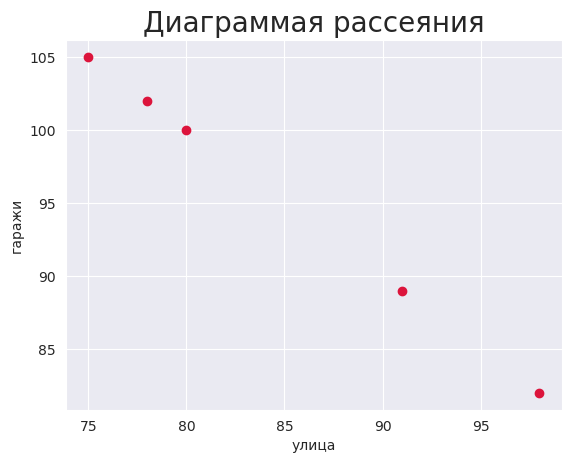

In [161]:
street_vec = [80, 98, 75, 91, 78]
garage_vec = [100, 82, 105, 89, 102]

print(sts.pearsonr(street_vec, garage_vec))
# нулевая гипотеза: переменные не связаны
plt.grid(True)
plt.title("Диаграммая рассеяния", fontsize=20)
plt.xlabel("улица")
plt.ylabel("гаражи")
plt.scatter(street_vec, garage_vec, marker='o', color="crimson")

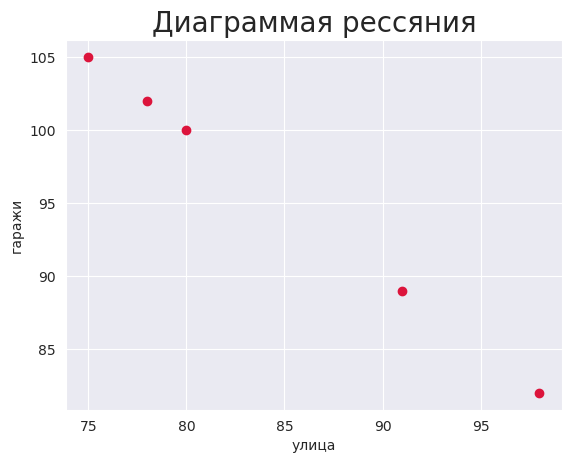

regression coef: [0.98893729]
regression intercept: 354.0855818072705


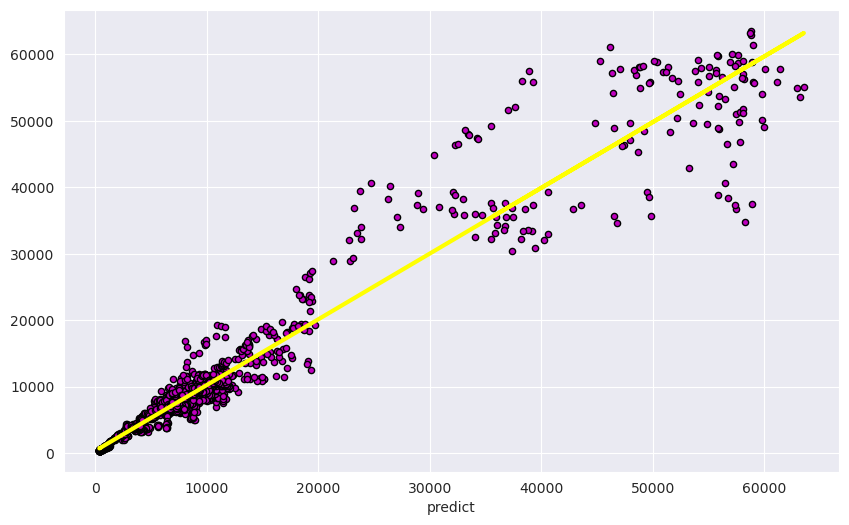

In [156]:

data = pd.read_csv("bitcoin.csv")
projection = 14
data["predict"] = data["close"].shift(-projection)

df = data[:-projection]
X = np.array(df["close"], type(float)).reshape((-1, 1))
Y = np.array(df["predict"], type(float))

regression = linear_model.LinearRegression()
regression.fit(X, Y)

print(f"regression coef: {regression.coef_}")
print(f"regression intercept: {regression.intercept_}")

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="m", s=20, edgecolors="black")
plt.plot(X, regression.predict(X), color="yellow", linewidth=3)
plt.xlabel("close")
plt.xlabel("predict")
plt.show()

In [157]:
x = np.array(data["close"][-projection:]).reshape((-1, 1))
print(regression.predict(x))
print(data["close"][-projection:].to_numpy())
print(regression.score(X, Y))

[34582.76786095 35622.15084671 37232.3781069  36631.77670928
 37515.36251368 39149.75940135 36807.79765831 35499.33472412
 35756.62654    33565.42828749 33393.86744566 37332.01353931
 36629.07691047 36789.82866767]
[34611.58 35662.59 37290.83 36683.51 37576.98 39229.66 36861.5  35538.4
 35798.57 33582.86 33409.38 37391.58 36680.78 36843.33]
0.9490624388820347


In [158]:
df = pd.read_csv("housePrice.csv")

print(df.info())

df["Address"].fillna("other");

for ind, row in df.iterrows():
    if str(row["Area"]).find(",") != -1:
        # new_row = row["Area"]
        # new_row = new_row.replace(",", '')
        # df.at[ind, "Area"] = new_row
        df = df.drop(ind)

df.Area = df.Area.astype(int)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   int64  
 1   Room        3473 non-null   int64  
 2   Parking     3473 non-null   bool   
 3   Warehouse   3473 non-null   bool   
 4   Elevator    3473 non-null   bool   
 5   Address 

b_1 = 2814.255602789662 b_0 = -122003.48674957838


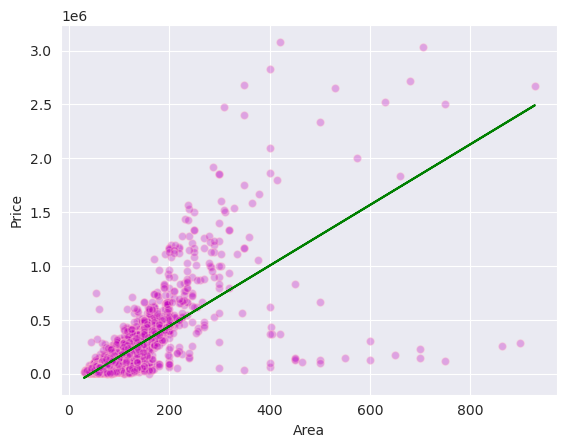

In [159]:
x = np.array(df["Area"], type(float))
y = np.array(df["Price(USD)"], type(float))

# x = np.array([0, 1, 2, 3, 4, 5, 6, 7 , 8, 9])
# y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

n = x.size

m_x = np.mean(x)
m_y = np.mean(y)

ss_xy = np.sum(y * x) - n * m_y * m_x
ss_xx = np.sum(x * x) - n * m_x * m_x

b_1 = ss_xy / ss_xx
b_0 = m_y - b_1 * m_x

print(f"b_1 = {b_1} b_0 = {b_0}")

plt.scatter(x, y, color="m", marker="o", s=30, alpha=0.3, edgecolors="pink")
y_pred = b_0 + b_1 * x

plt.plot(x, y_pred, color="g")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()
